# 1.머신러닝(1) (06.12.금)
     - https://hunkim.github.io/ml/

## 종류

### 1. 지도학습
####  1) 회귀 : 연속적인 데이터를 예측할 때 쓰인다. 연속적인 데이터란? 시계열데이터 
       - 선형회귀
       
####  2) 분류 : YES or NO.처럼 선택할 때.두가지로 분류를 하고 둘 중에 하나 선택하는 것
       - KNN (K Nearest Neighbors. K 최근접 이웃)
       - 로지스틱 선형회귀
       - Decision
       - Random Forset
       - SVN
       - Navie Bayes

### 2. 비지도학습
####  1) 클러스터링 : 분류와 비슷. 군집이라고 한다. 분류는 지도학습이기 때문에 답을 알려주고 학습하지만 클러스터링은 
####                           비지도 학습이기 때문에 답이 없이 학습한다. 
       - K Means
     


### 3. 인공신경망
 1) 훈련(학습) 데이터셋과 테스트 데이터셋은 분리가 되어야 한다.
 2) 일반화,과대적합(Overfitting),과소적합(Underfitting)
       - 과대적합 : 훈련데이터는 좋지만 테스트를 실제로 해보니 결과가 별로 인것. 훈련에만 과대하게 적합.
                    그래서 실전에서 잘 못 쓸 수 있다. 일반성(일반화)가 떨어진다.
                    과대적합은 너무 복잡해서 생기기도 한다. 
                    
                    - 정규화 : 너무 복잡한것을 완화시키기 
                    - 잡읍제거(오류,이상치 제거)
      
       - 과소적합 : 모델이 너무 단순해서 데이터의 내재된 구조를 학습하지 못할 때
                    
                    - 과대적합이 되기 전까지 충분히 학습
                    - 좀 더 복잡한 모델을 선택한다.
       

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split

# pip install mglearn
import mglearn

## KNN(K- Nearest Neighbors)
      1) 특징
          - 이해하기 쉽고 직관적이 모델
          - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 모델
          - 훈련셋이 너무 크면 예측이 느려진다.
          
      2) (하이퍼)파라미터
          - 이웃의 개수(K개수)가 중요하다.
          - 이웃의 갯수는 보통 홀수개로 지정한다. 왜냐하면 짝수개일 때 다수결을 따르기 힘들기 때문에 홀수개로 지정한다.
          - KNN에서 거리는 보통 L2norm을 사용한다.

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


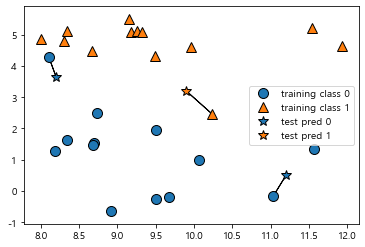

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

#파란 별을 가장 가까운 것이 원모양이기 때문에 원으로 출력된다.
#노란 별은 가장 가까운 것이 삼각형이기 때문에 삼각형으로 출력된다. 
# 둘다 가장 가까운 모양에 영향을 받는다. 

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


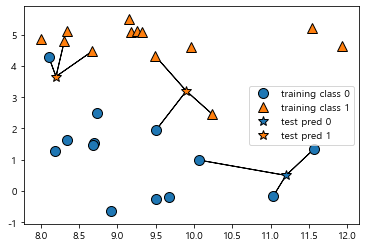

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 지금은 별이 여러개로 묶여있다. 이렇게 동시게 여러개로 묶여있으면 많은 것을 기준으로 한다.
# 그래서 이웃의 갯수가 중요한 역할을 한다.

In [12]:
# L1 norm(거리의 합), L2 norm(최단거리 구할 때 사용)

from numpy import linalg

df=pd.DataFrame(np.random.randint(low=-3,high=3, size=(3,3)))

df.columns=['move_1','move_2','move_3']
df


movements= df.values
linalg.norm(movements,ord=1)   #ord=1 이면 L1norm 을 한다. odr=2 이면 L2norm를 한다.

6.0

In [15]:
df=pd.DataFrame(np.random.randint(low=1,high=10,size=(3,2)))
df.columns=['x','y']
df

,x,y
0,3,5
1,5,7
2,5,9


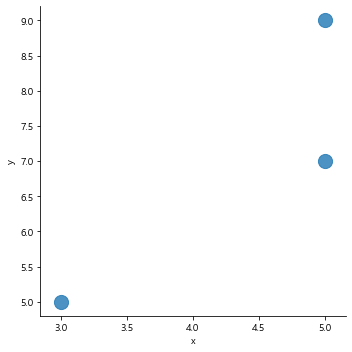

In [19]:
sns.lmplot('x','y',data=df,fit_reg=False, scatter_kws={'s':200})

In [20]:
movements= df.values
linalg.norm(movements,ord=2,axis=1)

array([ 5.83095189,  8.60232527, 10.29563014])

### KNN구현

In [27]:
X, y=mglearn.datasets.make_forge()    

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [28]:
X
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

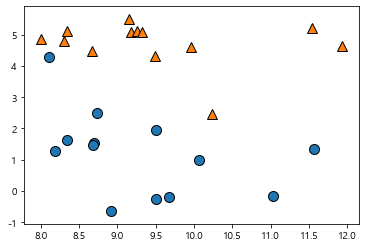

In [29]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [30]:
train_test_split(X,y,random_state=0)

[array([[ 8.92229526, -0.63993225],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [ 7.99815287,  4.8525051 ],
        [11.0329545 , -0.16816717],
        [ 9.17748385,  5.09283177],
        [11.563957  ,  1.3389402 ],
        [ 9.15072323,  5.49832246],
        [ 8.34810316,  5.13415623],
        [11.93027136,  4.64866327],
        [ 8.1062269 ,  4.28695977],
        [ 8.67494727,  4.47573059],
        [ 9.67284681, -0.20283165],
        [ 9.50169345,  1.93824624],
        [ 8.69289001,  1.54322016],
        [ 9.96346605,  4.59676542],
        [ 9.50048972, -0.26430318],
        [ 9.25694192,  5.13284858],
        [ 8.68937095,  1.48709629]]),
 array([[11.54155807,  5.21116083],
        [10.06393839,  0.99078055],
        [ 9.49123469,  4.33224792],
        [ 8.18378052,  1.29564214],
        [ 8.30988863,  4.80623966],
        [10.24028948,  2.45544401],
        [ 8.34468785,  1.63824349]]),
 array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)
# X,y 일반적으로 데이터는 대문자로 정답은 소문자로 구별해준다.

print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(19, 2) (7, 2) (19,) (7,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)         # 지도학습 X는 데이터이고 y는 정답이다. 정답을 알려주면서 데이터가 넘어가기 때문에 지도학습.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [38]:
clf.score(X_test,y_test)

0.8571428571428571

### KNN분석   

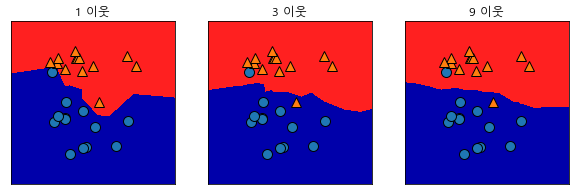

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neigh, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax)
    
    ax.set_title("{} 이웃".format(n_neigh))

In [48]:
#예제
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
cancer
cancer.keys()
cancer.target
cancer.feature_names
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [49]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, random_state=66, stratify=cancer.target)
# cancer.data 는 데이터 , cancer.target는 정답이다.


# stratify -> 비교하는 것의 비율을 똑같이 뽑아내기 위함. 실제 입력한 데이터가 6:4비율이면 실제 테스트에서도 6:4 비율이 나오게
#             하기 위함이다. 
#             여러 층으로 분할후 각 층별로 렌덤 데이터 추출, 원래 데이터의 분포와 유사하게 데이터 추출

print(X_train.shape, X_test.shape)



(426, 30) (143, 30)


In [54]:
train_acc=[]
test_acc=[]

for n in range(1,11):
    clf= KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

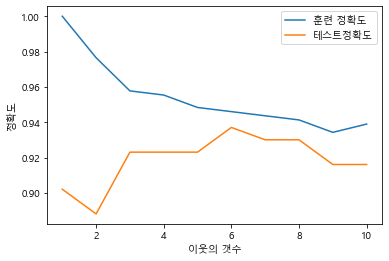

In [66]:
train_acc
test_acc

plt.plot(range(1,11),train_acc, label='훈련 정확도')
plt.plot(range(1,11),test_acc, label='테스트정확도')
plt.ylabel('정확도')
plt.xlabel('이웃의 갯수')
plt.legend()    # 어떤 선이 뭔지 표시하는거

In [72]:
test_acc[5]   #이것은 무엇?

0.9370629370629371

### 회귀분석을 위한 KNN

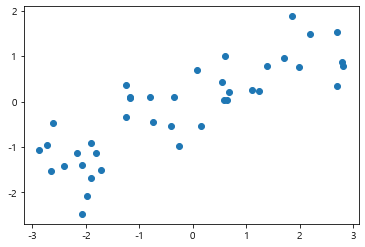

In [76]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')   # o는 점으로 그리겠다는 뜻이다.

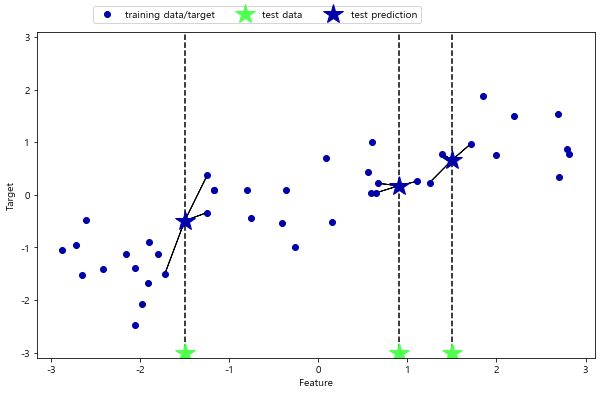

In [77]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)
print(X_train.shape,X_test.shape)

(30, 1) (10, 1)


In [81]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [82]:
print('테스트셋 예측:',reg.predict(X_test))

테스트셋 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [84]:
print('설명계수(R^2) : ', reg.score(X_test, y_test))

설명계수(R^2) :  0.8344172446249604


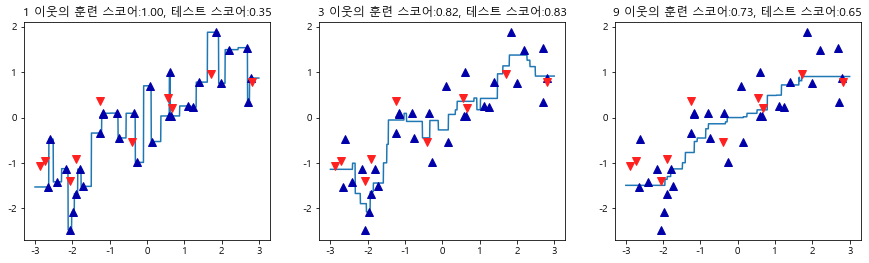

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neigh, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neigh).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0} 이웃의 훈련 스코어:{1:.2f}, 테스트 스코어:{2:.2f}".format(n_neigh, 
                                                         reg.score(X_train, y_train),
                                                         reg.score(X_test, y_test)))

In [87]:
# iris 
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [88]:
X_train, X_test, y_train, y_test= train_test_split(iris.data,iris.target,random_state=0)
print(X_train.shape,X_test.shape)

(112, 4) (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDCE230D08>,
      dtype=object)

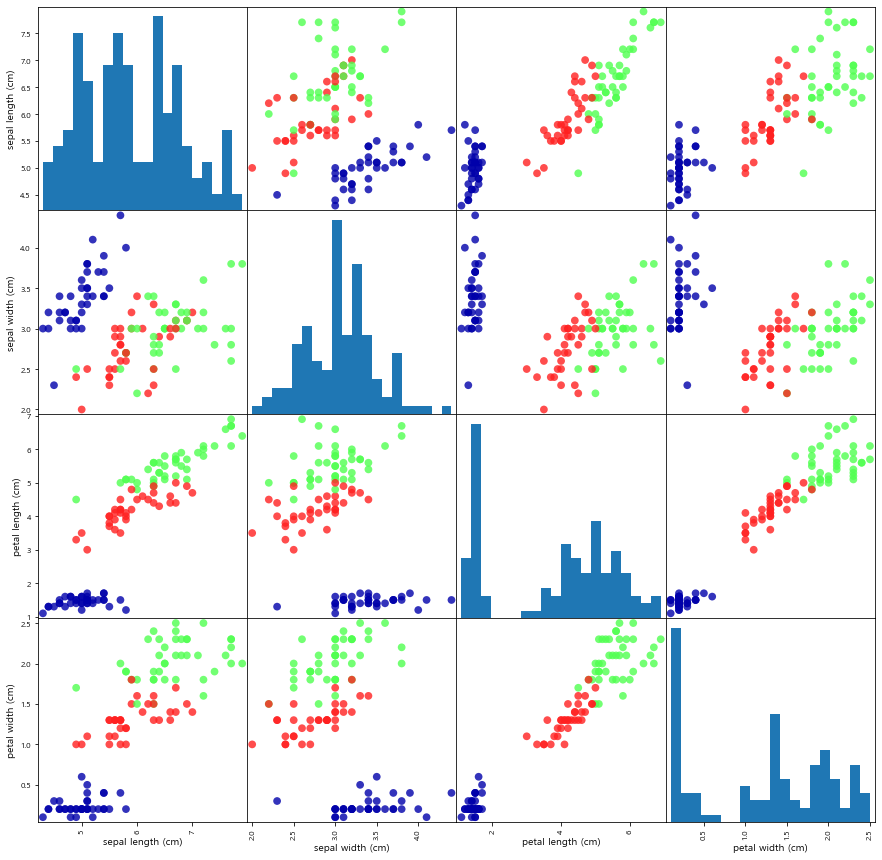

In [89]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), marker="o", c=y_train, s=60, alpha=.8, \
                          cmap=mglearn.cm3, hist_kwds={"bins":20})

In [90]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [91]:
pred=knn.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [92]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [94]:
print("정확도: ", knn.score(X_test, y_test))
print("정확도: ", np.mean(pred==y_test))

정확도:  0.9736842105263158
정확도:  0.9736842105263158


In [97]:
# sepal의 길이가 5cm, 폭 2.9cm, petal의 길이가 1cm, 폭이 0.2cm인 붓꽃의 품종은?

x_new= np.array([[5,2.9,1,0.2]])   #넘파이 배열로 넘겨줌.   #위에있는 featurename순서대로 값을 넘겨줌
pred=knn.predict(x_new)
pred
print(iris.target_names[pred])    

['setosa']
